<a href="https://colab.research.google.com/github/andrew-wairegi-school/core-week7-IP/blob/main/Moringa_Data_Science_Core_W7_Independent_Project_2021_11_Andrew_Wairegi_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House pricing - Hass Consulting Company

**Definitions:**

*   Id - ID of row
*   Price  - Price of house
*   Bedrooms - Number of Bedrooms
*   Bathrooms - Number of Bathrooms
*   Sqft_living - Square foot area of the living area
*   Sqft_lot  - Square foot area of the parking lot
*   Floors - Number of Floors in the house
*   Waterfront - Whether it has a waterfront
*   View - Number of Views
*   Grade - Grade of the house
*   sqft_above - Square foot of balcony
*   sqft_basement - Square foot of basement
*   yr_built - Year the house was built
*   yr_renovated - Year the house was renovated
*   zipcode - Zipcode of the house
*   lat - Latitude
*   lon - Longitude
*   sqft_living15 - Average square foot, of the closest 15 houses living area
*   sqft_lot15 - Average square foot, of the closest 15 houses lot area

## 1. Defining the Question

### a) Specifying the question

To find the main predictor variables that will determine the price of a house. As well as create a model that can accurately predict the house prices

### b) Defining Metric for success

Being able to identify predictor variables that have strong correlations to the house price. As well as be able to create a model that has a high accuracy rate. With the accuracy rate being under $200,000 in terms of a root mean squared error. This will allow us to punish the off values where it is off by a big amount. While being able to predict house prices of future houses.

### c) Understanding the context

Hass consulting is a real estate company. That has worked in real estate for over 25 years. They want to be able to create a model that will help them to determine the prices of houses. This will allow them to correctly predict the prices of houses in the future. As opposed to relying on a human real estator, to determine the values for them. They also want to know the main variables. So that they are able to understand it, and know what to focus on when selling houses.


### d) Experimental design

Process:

1. Defining the question
2. Data loading
3. Previewing data
4. Cleaning the data
5. Exploratory data analysis - EDA
6. Implementing the solution
7. Challenging the solution
8. Conclusion
9. Recommendation
10. Follow up questions

### e) Data relevance

The data is relevant because it was sourced from the government. From their website. This means that it is valid because Hass consulting has gotten it from a trusted source.

## 2. Reading the data

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading the data
df = pd.read_csv("https://drive.google.com/uc?id=173eyHHdaFiRgRraDpntlXfRTiPZriI3V")
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 3. Previewing the data

In [ ]:
# Number of records
df.shape

(21613, 20)

In [ ]:
# Top of dataset
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# Tail of dataset
df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
# Checking if datatypes are appropriate
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

## 4. Cleaning the Data

In [ ]:
# 1. Checking for null values
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
# 2. Checking for duplicates
df.duplicated().sum()

3

In [ ]:
# Dropping duplicates
df.drop_duplicates(inplace = True)

In [ ]:
# 3. Dropping the columns we don't need
df.drop(["id", "zipcode", "lat", "long"], axis = 1, inplace = True)

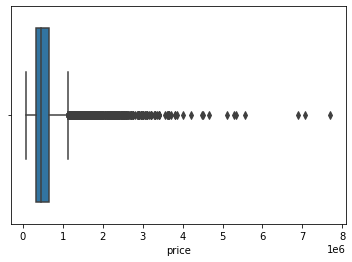

In [ ]:
# 4. Checking for outliers
sns.boxplot(data = df, x = "price")

In [ ]:
# Possible that houses cost more than the others
# even 8 million. Since they may be mansions. Or very
# expensive houses

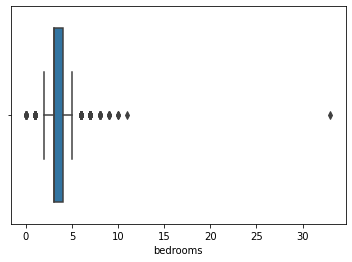

In [ ]:
sns.boxplot(data = df, x = "bedrooms")

In [ ]:
# One outlier here

In [ ]:
df[df["bedrooms"] > 30]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
15870,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,1330,4700


In [ ]:
# I'll drop the row

In [ ]:
df.drop(15870, axis = 0, inplace = True)

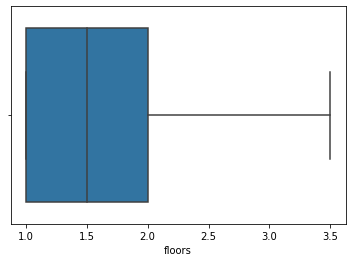

In [ ]:
sns.boxplot(data = df, x = "floors")

In [ ]:
df["waterfront"].unique()

array([0, 1])

In [ ]:
df["view"].unique()
# Quality of view

array([0, 3, 4, 2, 1])

In [ ]:
df["condition"].unique()

array([3, 5, 4, 1, 2])

In [ ]:
df["grade"].unique()
# Grade of the house - max 13

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1])

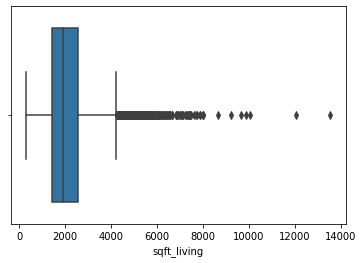

In [ ]:
sns.boxplot(data = df, x = "sqft_living")

In [ ]:
# Some houses are large,
# this is normal.
# Especially the expensive ones.

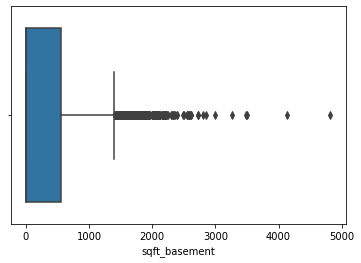

In [ ]:
sns.boxplot(data = df, x = "sqft_basement")

In [ ]:
# There are some large houses.
# So they may also have large basements.

In [ ]:
df["yr_built"].max()

2015

In [ ]:
df["yr_renovated"].max()

2015

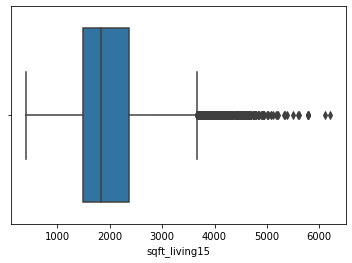

In [ ]:
sns.boxplot(data = df, x = "sqft_living15")

In [ ]:
# Not abnormal some houses were in very
# expensive areas

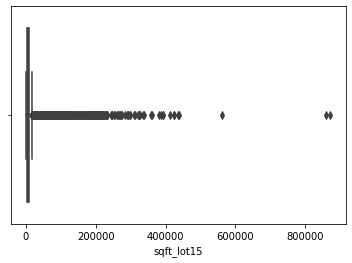

In [ ]:
sns.boxplot(data = df, x = "sqft_lot15")

In [ ]:
# It's possible that most houses had small lot areas.
# As most houses have small lot areas. This may be why the larger houses
# look like they are outliers.

In [ ]:
# 5. Checking for anomalies
df[df["yr_renovated"] < df["yr_built"]]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503
5,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,4760,101930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,1410,1287


In [ ]:
# This is not an anomaly.
# Zero was just entered, to mean that it has not been renovated.
# Which is good as it will not mess up the model.

In [ ]:
# There are some anomoalies with the counts,
# like bathroom counts.
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [ ]:
# They need to be rounded to whole numbers
df[["bedrooms", "bathrooms", "waterfront", "view", "condition"]] = df[["bedrooms", "bathrooms", "waterfront", "view", "condition"]].apply(np.round)

In [ ]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.0,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [ ]:
# 6. Trim strings of column names
df.columns = df.columns.str.strip()

In [ ]:
# 7. Change column names

# The column names look ok,
# I am comfortable with them

## 5. Exploratory Data analysis

### Univariate analysis

In [ ]:
df["price"].describe()

count    2.160900e+04
mean     5.401743e+05
std      3.673955e+05
min      7.500000e+04
25%      3.215000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

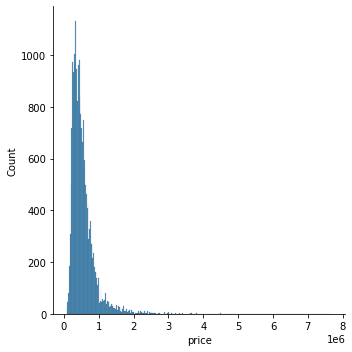

In [ ]:
sns.displot(data = df, x = "price")

In [ ]:
# The distribution of the prices is normal
# Most houses, are cheaper between 0 and $1,000,000 

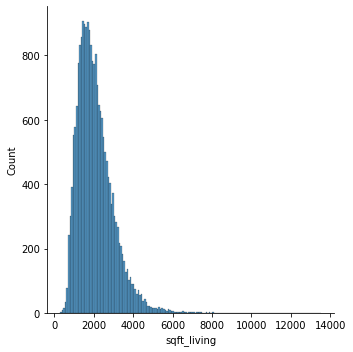

In [ ]:
sns.displot(data = df, x = "sqft_living")

In [ ]:
# Normal distribution
# Most are around 2000 square
# foot. Then it goes down.

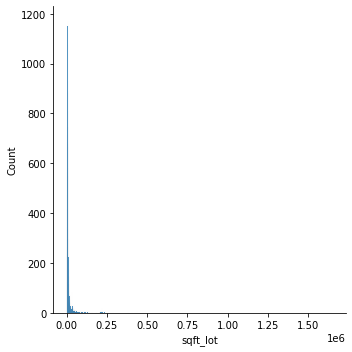

In [ ]:
sns.displot(data = df, x = "sqft_lot")

In [ ]:
# Most homes have a very small
# lot area. Becuase they are not expensive.
# And most people don't want to spend the money outside. 

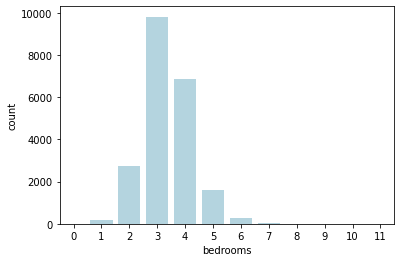

In [ ]:
sns.countplot(data = df, x = "bedrooms", color = "lightblue")

In [ ]:
# Normal, most houses have 3 bedrooms. Then
# they either increase, or decrease from there

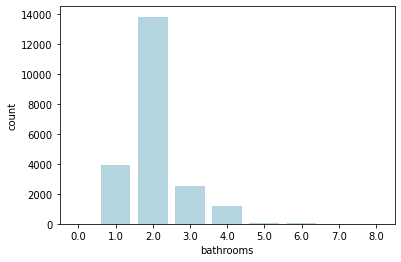

In [ ]:
sns.countplot(data = df, x = "bathrooms", color = "lightblue")

In [ ]:
# Most houses also only have 2 bathrooms. Even though they have 3
# bedrooms. So they do not make them equally

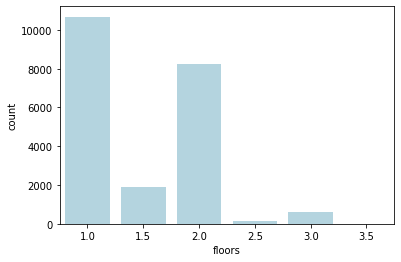

In [ ]:
sns.countplot(data = df, x = "floors", color = "lightblue")

In [ ]:
# I believe a half, is an attic.
# Which is ok.
# It would help the model.

# Otherwise most houses have 1 / 2
# floors

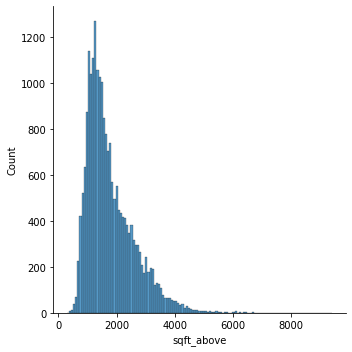

In [ ]:
sns.displot(data = df, x = "sqft_above")

In [ ]:
# Most houses have balconys.
# Which is good as it will raise the price.
# Also it is normal that they are around 1200 foot in
# size.

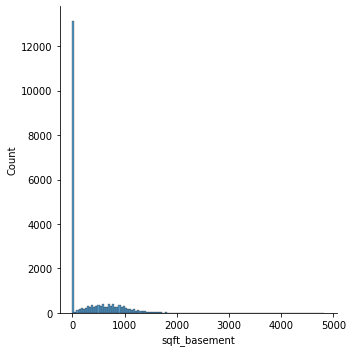

In [ ]:
sns.displot(data = df, x = "sqft_basement")

In [ ]:
# Most houses did not have a basement
# Which is normal. As people do not believe that
# basements raise prices.

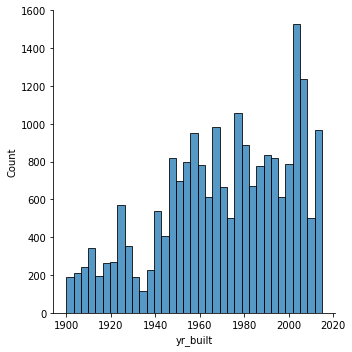

In [ ]:
sns.displot(data = df, x = "yr_built")

In [ ]:
# It seems houses in this dataset are more recent.
# Which means they may sell for more.
# As they may have more modern things.

# However, it means we can't account for old houses that
# much.

### Bivariate analysis

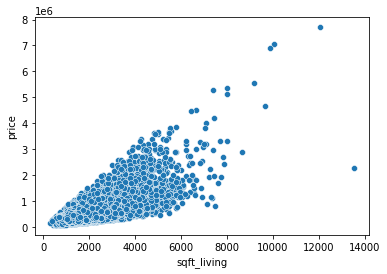

In [ ]:
sns.scatterplot(data = df, x = "sqft_living", y = "price")

In [ ]:
# Price increases with square foot living
# area

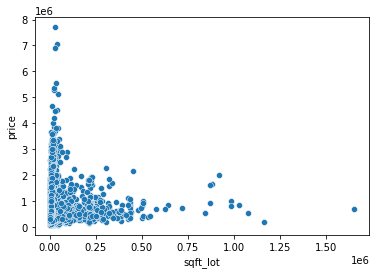

In [ ]:
sns.scatterplot(data = df, x = "sqft_lot", y = "price")

In [ ]:
# Price increases momentarily with square foot lot
# area

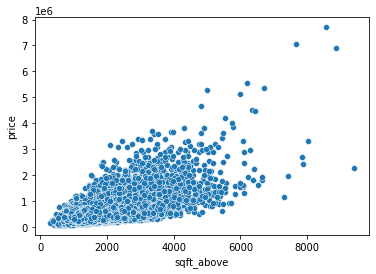

In [ ]:
sns.scatterplot(data = df, x = "sqft_above", y = "price")

In [ ]:
# Square foot of balcony increases
# house price.

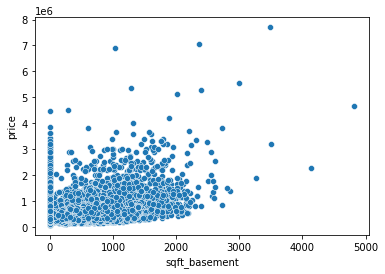

In [ ]:
sns.scatterplot(data = df, x = "sqft_basement", y = "price")

In [ ]:
# Square foot of basement increases house price
# However, there are some houses with no basement
# Which have higher house prices. Which is normal

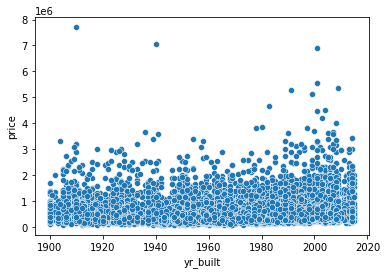

In [ ]:
sns.scatterplot(data = df, x = "yr_built", y = "price")

In [ ]:
# It seems houses that are more modern tend
# to have higher prices. However, they seem not
# to all have high prices. As some still have lower prices.

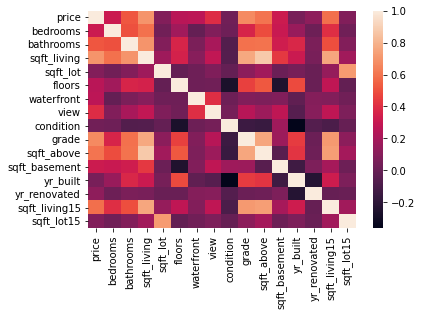

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,1.000000,0.315442,0.518932,0.702057,0.089661,0.256810,0.266333,0.397471,0.036371,0.667491,0.605593,0.323844,0.053992,0.126506,0.585408,0.082461
bedrooms,0.315442,1.000000,0.501653,0.591471,0.032803,0.181105,-0.006612,0.081829,0.025426,0.366539,0.490619,0.309473,0.159268,0.019468,0.402621,0.030391
bathrooms,0.518932,0.501653,1.000000,0.701792,0.089985,0.366677,0.065427,0.202719,-0.066689,0.591298,0.599380,0.334917,0.377476,0.069373,0.497505,0.086950
sqft_living,0.702057,0.591471,0.701792,1.000000,0.172826,0.353941,0.103819,0.284636,-0.058720,0.762716,0.876601,0.435076,0.318087,0.055310,0.756418,0.183280
sqft_lot,0.089661,0.032803,0.089985,0.172826,1.000000,-0.005181,0.021600,0.074750,-0.008944,0.113640,0.183521,0.015278,0.053098,0.007675,0.144614,0.718555
floors,0.256810,0.181105,0.366677,0.353941,-0.005181,1.000000,0.023708,0.029312,-0.263717,0.458140,0.523856,-0.245653,0.489330,0.006147,0.279832,-0.011263
waterfront,0.266333,-0.006612,0.065427,0.103819,0.021600,0.023708,1.000000,0.401992,0.016665,0.082783,0.072078,0.080588,-0.026163,0.092950,0.086467,0.030700
view,0.397471,0.081829,0.202719,0.284636,0.074750,0.029312,0.401992,1.000000,0.045877,0.251372,0.167650,0.277009,-0.053242,0.103206,0.280397,0.072573
condition,0.036371,0.025426,-0.066689,-0.058720,-0.008944,-0.263717,0.016665,0.045877,1.000000,-0.144612,-0.158135,0.174023,-0.361310,-0.060847,-0.092760,-0.003391
grade,0.667491,0.366539,0.591298,0.762716,0.113640,0.458140,0.082783,0.251372,-0.144612,1.000000,0.755915,0.168463,0.446955,0.014367,0.713204,0.119259


In [ ]:
df.corr()["price"].sort_values(ascending = False)

price            1.000000
sqft_living      0.702057
grade            0.667491
sqft_above       0.605593
sqft_living15    0.585408
bathrooms        0.518932
view             0.397471
sqft_basement    0.323844
bedrooms         0.315442
waterfront       0.266333
floors           0.256810
yr_renovated     0.126506
sqft_lot         0.089661
sqft_lot15       0.082461
yr_built         0.053992
condition        0.036371
Name: price, dtype: float64

In [ ]:
# Most correlated values are:
# sqft_living, grade, sqft_above, sqft_living15,
# bathrooms, view, sqft_basement, and bedrooms

### Multivariate analysis

In [158]:
from sklearn.decomposition import PCA

Selecting X

In [155]:
X = df.drop(["price", "yr_renovated"], axis = 1)

Scaling the data

In [154]:
standardScaler = StandardScaler()
standardScaler.fit(X)
X_scaled = standardScaler.transform(X)

Performing PCA

In [159]:
pca = PCA(n_components=5)
pca.fit(X)
pca.components_

array([[ 6.65335566e-07,  1.53331950e-06,  3.67151815e-03,
         8.69621073e-01, -8.31527692e-08,  4.73936842e-08,
         1.29237953e-06, -1.10177876e-07,  3.08117435e-06,
         3.51197544e-03,  1.59542710e-04,  3.87500472e-05,
         2.41921745e-03,  4.93687650e-01],
       [-1.73158932e-07, -6.07451033e-07, -2.66164307e-03,
         4.93712633e-01,  3.01901858e-07, -8.76313496e-08,
        -5.29097248e-07, -2.32838758e-07, -2.12129069e-06,
        -2.50733223e-03, -1.54310841e-04, -6.22285622e-05,
        -3.37139272e-03, -8.69610873e-01],
       [ 3.92795920e-04,  3.86992960e-04,  6.74519861e-01,
        -2.52974144e-03,  1.76513036e-04,  6.18687797e-06,
         1.50808589e-04, -5.12390824e-05,  7.16230830e-04,
         5.85350453e-01,  8.91694076e-02,  8.31678872e-03,
         4.40808776e-01, -6.91387762e-03],
       [ 2.80579073e-04,  2.29119999e-04,  3.20280512e-01,
         2.39194032e-04, -3.84759532e-04,  9.55187807e-06,
         3.20849903e-04,  2.57036896e-04, -8.

Analyzing

In [161]:
pca.explained_variance_ratio_

array([8.83776297e-01, 1.15363201e-01, 6.84002665e-04, 1.12553370e-04,
       6.36638389e-05])

In [162]:
sum(pca.explained_variance_ratio_)

0.9999997179198331

In [ ]:
# This means we can simplify the dataset into
# 5 components. While we can do this. I believe it is better
# to use the dataset as it is. As opposed to transforming it,
# as we would have to save the PCA. For us to transform any 
# new data that we use on the models.

## 6. Implementing the solution

#### Multicollinearity check

In [ ]:
correlations_independent = (df.drop("price", axis = 1)).corr()
collinearity_df = pd.DataFrame(np.linalg.inv(correlations_independent.values), index = correlations_independent.index, columns=correlations_independent.columns)
collinearity_df[(collinearity_df > 8)]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
bedrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sqft_living,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.326920e+13,2.312533e+13,NaN,NaN,NaN,NaN
sqft_lot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
grade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sqft_above,NaN,NaN,4.326920e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Sqft_above & Sqft_basement seem to have high VIF
# values with sqft_living area. Because they are in the same
# area. However it may mess up some of our models. So it will be
# left out in some models, that are affected by multicollinearity.

Importing the libraries

In [142]:
# Train test split libraries
from sklearn.model_selection import train_test_split
# Preprocessing libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
# Model libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNetCV
import statsmodels.formula.api as sm
# Statistics libraries
import scipy as sp
from sklearn import metrics

X & Y for models

In [ ]:
X = df.drop(["price", "yr_renovated"], axis = 1)
y = df["price"]

In [ ]:
# Variables to store predictions and y_trues
model_predictions = []
y_trues = []

### Polynomial regression

Choosing a degree value

In [ ]:
train_RMSES = []
test_RMSES = []

for num in range(1, 4):
  poly_feat = PolynomialFeatures(degree = num, include_bias = False) 
  poly_feat.fit(X)
  X_poly = poly_feat.transform(X)

  X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=101)

  pol_reg = LinearRegression()
  pol_reg.fit(X_train, y_train)
  predictions_train = pol_reg.predict(X_train)
  predictions_test = pol_reg.predict(X_test)

  train_rmse = np.sqrt(metrics.mean_squared_error(y_train, predictions_train))
  test_rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions_test))
  
  train_RMSES.append(train_rmse)
  test_RMSES.append(test_rmse)

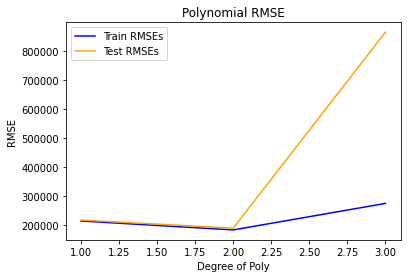

In [ ]:
plt.plot(range(1, 4), train_RMSES[:3], color='blue', label = "Train RMSEs")
plt.plot(range(1, 4), test_RMSES[:3], color='orange', label = "Test RMSEs")
plt.title("Polynomial RMSE")
plt.ylabel("RMSE")
plt.xlabel("Degree of Poly")
plt.legend()
plt.show()

In [ ]:
train_RMSES

[214798.18986335857, 183988.83054581273, 275349.43971243314]

In [ ]:
test_RMSES

[218040.73704333362, 190103.93988980248, 865675.4156812129]

In [ ]:
# It seems that both RMSEs are going down
# This means that polynomial degree of 2, is the best choice.
# As we do not want to make it complex. Also it seems
# to go up at degree 3.
# So that is the most optimal choice

Modelling

In [ ]:
# Creating the poly features
poly_feat = PolynomialFeatures(degree = 2, include_bias = False) 
poly_feat.fit(X)
X_poly = poly_feat.transform(X)

In [ ]:
# Train test split with poly features
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.25, random_state=101)
y_trues.append(y_test)

In [ ]:
# Creating the model
pol_reg = LinearRegression()
pol_reg.fit(X_train, y_train)

LinearRegression()

Evaluation

In [ ]:
# Doing predictions
predictions = pol_reg.predict(X_test)
model_predictions.append(predictions)

In [ ]:
# Doing the metrics for evaluation
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 126649.78978831155
Mean Squared Error: 36730531849.87888
Root Mean Squared Error: 191652.1115194896


In [ ]:
# The average error is 126,000.
# Which is not bad considering that we had houses over
# 100,000. This means it was still not performing badly
# on them.

### Quantile regression

Test train split

In [ ]:
train, test = train_test_split(df, test_size=0.25, random_state=101)

In [ ]:
X_test = test.drop(["price", "yr_renovated"], axis = 1)
y_test = test["price"]

for i in range(3):
  y_trues.append(y_test)

Modelling

In [ ]:
# This model is affected by multicollinearity,
# so we will have to drop the sqft_above and sqft_basement
# as they are highly correlated to the sqft_living variable

In [ ]:
# I will also only be using 7 features.
# as it takes a long time to create the model

In [ ]:
models = []

for quantile in [0.2, 0.5, 0.8]:
  olsmod = sm.quantreg('price ~ sqft_living + grade + sqft_above + sqft_living15 + bathrooms + view + bedrooms', data = train)
  model = olsmod.fit(q = quantile, max_iter = 100000000)
  models.append(model)

Coefficients at different quartiles

In [ ]:
# Quartile - 20
models[0].params

Intercept       -351789.847607
sqft_living         108.536170
grade             73321.696599
sqft_above          -38.328589
sqft_living15        30.980694
bathrooms          9449.496466
view              41190.908705
bedrooms         -24657.842749
dtype: float64

In [ ]:
# It seems for the 20th quartile.
# The most important independent variables
# were: grade, view, and no. of bathrooms

In [ ]:
# Quartile - 50
models[1].params

Intercept       -373581.639199
sqft_living         160.905188
grade             87990.309664
sqft_above          -54.572209
sqft_living15        25.287165
bathrooms         -2502.177017
view              68680.166820
bedrooms         -27092.101379
dtype: float64

In [ ]:
# For the 50th quartile.
# the most important independent variables were:
# grade, and view. Whereas bathrooms had a strong negative
# coefficient. 

In [ ]:
# Quartile - 80
models[2].params

Intercept       -352518.002147
sqft_living         242.347467
grade             93202.721108
sqft_above          -83.718358
sqft_living15        24.457154
bathrooms         -5829.390299
view             121126.607005
bedrooms         -32113.537990
dtype: float64

In [ ]:
# For the 80th quartile. The most important
# independent variables were: View, and then grade.
# Which means they switched. However, there was a strong
# negative coefficient on bedrooms.

Evaluation

In [ ]:
RMSEs = []

for model in models:
  predictions = model.predict(X_test)
  model_predictions.append(predictions)
  RMSEs.append(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [ ]:
# 20th percentile error metric
print('Root Mean Squared Error: ' + str(RMSEs[0]))

Root Mean Squared Error: 311963.902295579


In [ ]:
# This is higher than the polynomial root mean
# squared error.

In [ ]:
# 50th percentile error metric
print('Root Mean Squared Error: ' + str(RMSEs[1]))

Root Mean Squared Error: 249922.9363832033


In [ ]:
# This is still a higher error,
# than the polynomial regression error.

In [ ]:
# 80th percentile error metric
print('Root Mean Squared Error: ' + str(RMSEs[2]))

Root Mean Squared Error: 276522.51499778416


In [ ]:
# This is the second largest error.
# which means that fitting to a higher quartile.
# Can give you better results when making a model.

### Ridge regression

Scaling the data

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

Modelling

In [ ]:
ridge = Ridge()
cv_search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=8)
cv_search.fit(x_scaled, y)

GridSearchCV(cv=8, estimator=Ridge(), n_jobs=1,
             param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             scoring='neg_mean_squared_error')

Model parameters

In [ ]:
cv_search.best_params_

{'alpha': 100.0}

Evaluation

In [ ]:
print('Root Mean Squared Error: ' + str(np.sqrt(abs(cv_search.best_score_))))

Root Mean Squared Error: 216947.51417149417


In [ ]:
# Re-evaluation
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=101)
y_trues.append(y_test)

In [ ]:
predictions = cv_search.predict(X_test)
model_predictions.append(predictions)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Root Mean Squared Error: 216668.8408977115


In [ ]:
# This is not a bad error score.
# As it is very close to the polynomial root
# mean squared error, of 191,000.
# Also we are using ridge regression to make
# it simpler, so there is no issue.

### Lasso regression

Scaling the data

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

Training the model

In [ ]:
lasso_cv_model = LassoCV(eps = 0.001, n_alphas = 100, cv = 5)
lasso_cv_model.fit(x_scaled, y)

LassoCV(cv=5)

Model parameters

In [ ]:
lasso_cv_model.alpha_

276.56639711169527

Evaluation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=101)
y_trues.append(y_test)

In [ ]:
predictions = lasso_cv_model.predict(X_test)
model_predictions.append(predictions)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Root Mean Squared Error: 216678.06967054764


In [ ]:
# The root mean squared error is 216,000.
# Which is not bas when compared to the polynomial root mean
# squared error of 191,000. Which means it is not badly off.
# However it is higher than the ridge regression model. But this
# is to be expected. As lasso is much more punishing on high coefficients,
# than ridge.

### Elastic Net regression

In [ ]:
X.shape

(21609, 14)

Scaling the data

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.14, random_state=101)
y_trues.append(y_test)

Modelling

In [ ]:
elastic_model = ElasticNetCV(l1_ratio = [.1, .5, .7, .9, .95, .99, 1], eps = 0.001,
                             n_alphas = 100, max_iter = 10000000)

In [ ]:
elastic_model.fit(X_train, y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=10000000)

Model Coefficients

In [ ]:
elastic_model.l1_ratio_

1.0

In [ ]:
# Ratio of L2 to L1 regularization
elastic_model.alpha_

511.75642671823607

Evaluation

In [ ]:
predictions = elastic_model.predict(X_test)
model_predictions.append(predictions)

In [ ]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Root Mean Squared Error: 225579.10120065877


In [ ]:
# It seems that the elastic net, had the worst root 
# mean squared error. This means it must have simplified 
# the coefficients. But the addition of L1 & l2 together. 
# Must have caused it to have a worse root mean squared error.

## 7. Challenging the solution

In [ ]:
# Calculate residuals
residuals = []
for i in range(len(model_predictions)):
  residuals.append(np.subtract(model_predictions[i], y_trues[i]))

### Polynomial regression

#### Residual plot

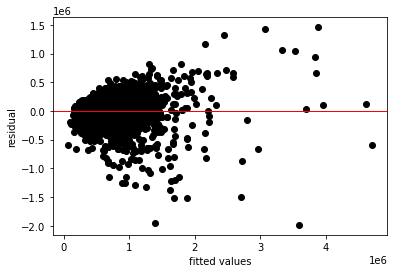

In [ ]:
plt.scatter(model_predictions[0], residuals[0], color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals[0].mean(), color='red', linewidth=1)
plt.show()

In [ ]:
# With higher values,
# there are more errors which is normal.
# As it should be harder to predict the more
# expensive houses. With the same variables.

#### Bartlett's test

In [153]:
test_result, p_value = sp.stats.bartlett(model_predictions[0], residuals[0])
    # p_value - chance of the distribution being normal

degree_of_freedom = len(model_predictions[0])-1
critical_value = sp.stats.chi2.ppf(p_value, degree_of_freedom) # determine critical value of the chi squared distribution

if (test_result > critical_value):
  print('the variances are unequal, it is not homogeneous')
else:
  print('the variances are homogeneous!')

the variances are homogeneous!


### Quantile regression - 20th quartile

#### Residual plot

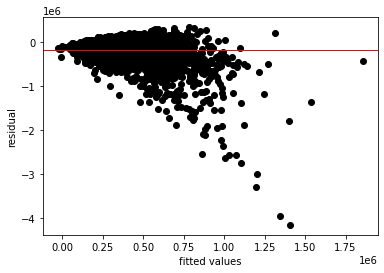

In [ ]:
plt.scatter(model_predictions[1], residuals[1], color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals[1].mean(), color='red', linewidth=1)
plt.show()

In [ ]:
# This makes sense, as the cheaper houses.
# are predicting with much more accuracy than the more
# espensive houses. Then the more expensive houses,
# are under-estimated. As the focus was on cheaper homes 

#### Bartlett's test

In [146]:
test_result, p_value = sp.stats.bartlett(model_predictions[1], residuals[1])

degree_of_freedom = len(model_predictions[1])-1
critical_value = sp.stats.chi2.ppf(p_value, degree_of_freedom) # determine critical value of the chi squared distribution

if (test_result > critical_value):
  print('the variances are unequal, it is not homogeneous')
else:
  print('the variances are homogeneous!')

the variances are homogeneous!


### Quantile regression - 50th percentile

#### Residual plot

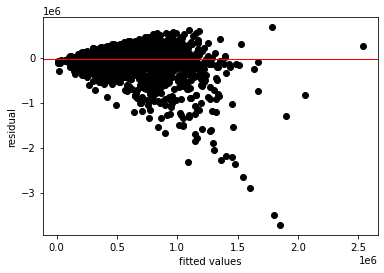

In [ ]:
plt.scatter(model_predictions[2], residuals[2], color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals[2].mean(), color='red', linewidth=1)
plt.show()

In [ ]:
# This should be equal to linear regression. With one
# polynomial. As linear regression also target the 50th percentile.
# However when compared to polynomial regression with 2 degrees.
# It under-estimates the more expensive houses. This can be expected
# as polynomial regression is more complex. So it may allow better
# fitting of those variables.

#### Bartlett's test

In [147]:
test_result, p_value = sp.stats.bartlett(model_predictions[2], residuals[2])

degree_of_freedom = len(model_predictions[2])-1
critical_value = sp.stats.chi2.ppf(p_value, degree_of_freedom) # determine critical value of the chi squared distribution

if (test_result > critical_value):
  print('the variances are unequal, it is not homogeneous')
else:
  print('the variances are homogeneous!')

the variances are homogeneous!


### Quantile regression - 80th percentile

#### Residual plot

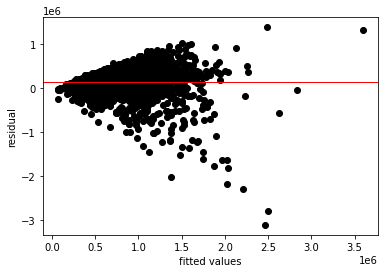

In [138]:
plt.scatter(model_predictions[3], residuals[3], color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals[3].mean(), color='red', linewidth=1)
plt.show()

In [ ]:
# This one fits the higher values more, than the lower
# values. As it targets 80% of the y_value. However, it cannot
# all of the more expensive houses. As most houses are still cheap
# in that range. Remember all the more expensive houses were seen
# as outliers in the boxplot.

#### Bartlett's test

In [148]:
test_result, p_value = sp.stats.bartlett(model_predictions[3], residuals[3])

degree_of_freedom = len(model_predictions[3])-1
critical_value = sp.stats.chi2.ppf(p_value, degree_of_freedom) # determine critical value of the chi squared distribution

if (test_result > critical_value):
  print('the variances are unequal, it is not homogeneous')
else:
  print('the variances are homogeneous!')

the variances are homogeneous!


### Ridge regression

#### Residual plot

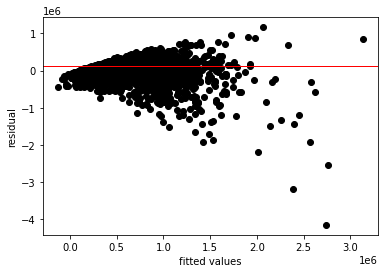

In [139]:
plt.scatter(model_predictions[4], residuals[4], color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals[3].mean(), color='red', linewidth=1)
plt.show()

In [ ]:
# Looks similar too the 50th percentile graph.
# However, it will move more towards where there are more
# houses. As it is a more relaxed model.
# That means it is better at predicting more
# similar houses.

#### Bartlett's test

In [149]:
test_result, p_value = sp.stats.bartlett(model_predictions[4], residuals[4])

degree_of_freedom = len(model_predictions[4])-1
critical_value = sp.stats.chi2.ppf(p_value, degree_of_freedom) # determine critical value of the chi squared distribution

if (test_result > critical_value):
  print('the variances are unequal, it is not homogeneous')
else:
  print('the variances are homogeneous!')

the variances are homogeneous!


### Lasso regression

#### Residual plot

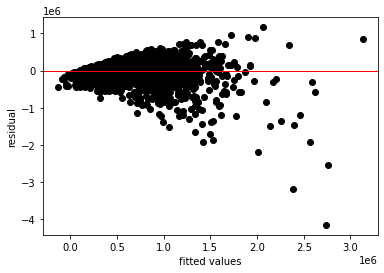

In [140]:
plt.scatter(model_predictions[5], residuals[5], color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals[5].mean(), color='red', linewidth=1)
plt.show()

In [ ]:
# Lasso regression is much more relaxed.
# So it has a higher error rate.
# However, it is still good at predicting houses
# that are similar. However, you can still see that
# it did not predict the houses that were expensive well.

#### Bartlett's test

In [150]:
test_result, p_value = sp.stats.bartlett(model_predictions[5], residuals[5])

degree_of_freedom = len(model_predictions[5])-1
critical_value = sp.stats.chi2.ppf(p_value, degree_of_freedom) # determine critical value of the chi squared distribution

if (test_result > critical_value):
  print('the variances are unequal, it is not homogeneous')
else:
  print('the variances are homogeneous!')

the variances are homogeneous!


### Elastic Net regression

#### Residual plot

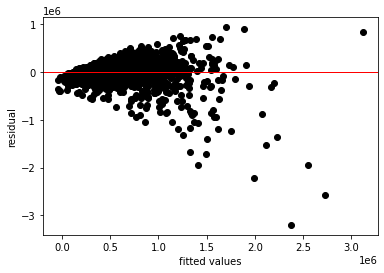

In [141]:
plt.scatter(model_predictions[6], residuals[6], color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals[6].mean(), color='red', linewidth=1)
plt.show()

In [ ]:
# Elastic net has much errors.
# Because while it is trying to predict similar houses,
# that are close to each other. It still relaxing several variables.
# With the different weights. That's why it might give us a more realistic
# model. But it will not be able to give us accurate predictions. Due to it's simplicity.

#### Bartlett's test

In [152]:
test_result, p_value = sp.stats.bartlett(model_predictions[6], residuals[6])

degree_of_freedom = len(model_predictions[6])-1
critical_value = sp.stats.chi2.ppf(p_value, degree_of_freedom) # determine critical value of the chi squared distribution

if (test_result > critical_value):
  print('the variances are unequal, it is not homogeneous')
else:
  print('the variances are homogeneous!')

the variances are homogeneous!


## Conclusion

In conclusion I believe that the Hass consulting company. Can use the polynomial regression model. Because it allowed them to gain more accuracy in their house predictions. Also by using this model, they can add more data easily. As it will not try to re-balance the coefficients. Which may make it to not increase in accuracy that much. As oppossed to a polynomial model which will increase in accuracy faster than the Lasso model training on the same data.

## Recommendation

In terms of the coefficients that are most determinant of the house price. The coefficients, are: sqft_living, grade, sqft_above, sqft_living15, and bathrooms. These had a 50% chance of affecting the house price. Based on the correlation matrix. This means that Hass consulting should focus on these areas. When they are trying to sell a house. It may allow them to get better sales. Than when sticking to the base price.

## 9. Follow up questions

### a). Did we have the right data?

Yes we have the right data. As it has the right columns. Additionally,
it is very detailed. As it does not have rounded values for the column entries.
This means it will give us accurate models.

### b). Do we need other data to answer our question?

No, however we might need a column for pricy houses. So that it's easier to determine if a house should have a higher predictive price or not. This would allow the model to be more accurate in more expensive houses. For example, if it was using polynomial regression. It would be able to predict the house price much more easily.

### c). Did we have the right question?

Yes, predicting the house price would the right question. As it would allow us to predict the house prices of several new houses. Using these features. Which is the basis of this dataset.